In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Fit parameters:
  A  = 0.046
  T2 = 1030.3 ns  (1.03 µs)
  n  = 4.00
  C  = 0.811


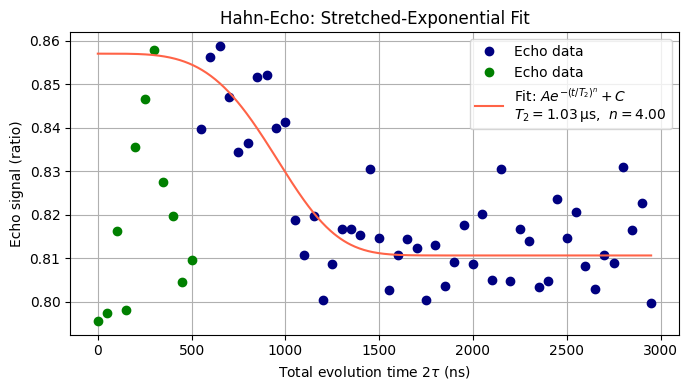

In [15]:

# -------------------------------------------------
# 1.  Load the data -------------------------------
# -------------------------------------------------
df = pd.read_excel(
    "/Users/adampearl/Documents/191/GitHub/nv-center/Second_draft/code/hahndata_0422.xlsx"
)

t_ns = df["Time (ns) - 2/1 Ratio (Avg)"].to_numpy()      # total evolution 2τ in ns
S    = df["Ratio - 2/1 Ratio (Avg)"].to_numpy()          # echo amplitude (ratio)

# -------------------------------------------------
# 2.  Define the stretched-exponential model -------
# -------------------------------------------------
n = 4

def stretched_exp(t, A, T2 ,C):
    """
    A  : amplitude (signal contrast)
    T2 : spin-echo coherence time  (same units as t)
    n  : stretch exponent  (1 = pure exponential, 2 ≈ Gaussian)
    C  : background offset
    """
    return A * np.exp(- (t / T2) ** n) + C

# -------------------------------------------------
# 3.  Initial parameter guesses -------------------
# -------------------------------------------------
A0  = S.max() - S.min()          # height of the echo at t=0
T2_0 = (t_ns.max() - t_ns.min()) / 4   # rough mid-range guess
n0  = 1.5                        # between 1 and 2 is common
C0  = S.min()                    # background
p0  = [A0, T2_0, C0]

cutoff = 11

# -------------------------------------------------
# 4.  Perform the fit -----------------------------
# -------------------------------------------------
popt, pcov = curve_fit(stretched_exp, t_ns[cutoff:-20], S[cutoff:-20], p0=p0)
A_fit, T2_fit, C_fit = popt
print(f"Fit parameters:\n"
      f"  A  = {A_fit:.3f}\n"
      f"  T2 = {T2_fit:.1f} ns  ({T2_fit*1e-3:.2f} µs)\n"
      f"  n  = {n:.2f}\n"
      f"  C  = {C_fit:.3f}")

# -------------------------------------------------
# 5.  Plot data + fitted curve --------------------
# -------------------------------------------------
t_plot = np.linspace(t_ns.min(), t_ns.max(), 500)
S_fit  = stretched_exp(t_plot, *popt)

plt.figure(figsize=(7, 4))
plt.plot(t_ns[cutoff:], S[cutoff:], 'o', label='Echo data', color='navy')
plt.plot(t_ns[:cutoff], S[:cutoff], 'o', label='Echo data', color='green')
plt.plot(t_plot, S_fit, '-', color='tomato',
         label=r'Fit: $A e^{-(t/T_2)^{{n}}}+C$' + 
               f'\n$T_2={T2_fit*1e-3:.2f}\,$µs,  $n={n:.2f}$')
plt.xlabel(r'Total evolution time $2\tau$ (ns)')
plt.ylabel('Echo signal (ratio)')
plt.title('Hahn-Echo: Stretched-Exponential Fit')
plt.grid(True);  plt.legend();  plt.tight_layout()
plt.show()